# Chapter 1

Ildar Rakhmatulin ildarr2016@gmail.com

## Import libraries



In [ ]:
# !pip install peakdetect
import itertools
#from peakdetect import peakdetect
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import scipy.interpolate as spi



## Import Dataset

1. Load dataset
Dataset visualtisation. Y data - it  is peak in the graph after filter in the X data after band pass filter
In the current moment X data is Raw

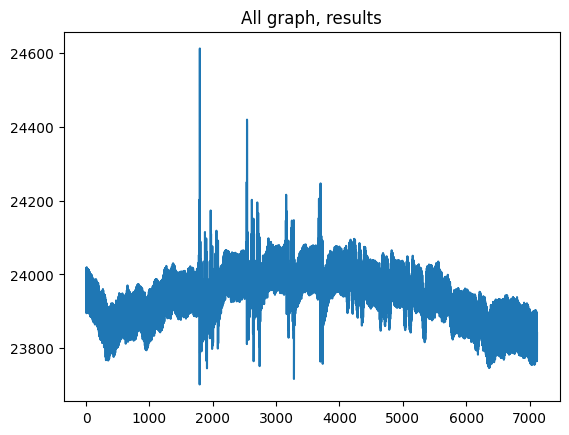

In [ ]:
len_data = 1169
value_data = 27

dataset_y = pd.read_excel("/content/drive/MyDrive/EEG_course/dataset/dataset.xlsx")

dataset_y = dataset_y.transpose()
plt.plot(dataset_y.iloc[0])
plt.title("All graph, results")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Signal proccessing


### Band Pass Filter

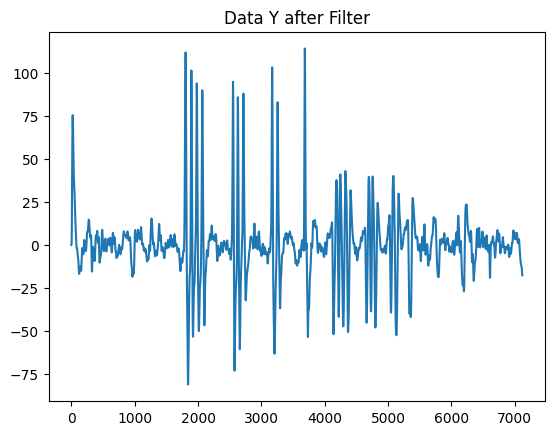

In [ ]:

def butter_highpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

fps = 250
cutoff_high=1
cutoff_low=10
x=[]
for a in range(0,8,1):
    filtered_sine_high = butter_highpass_filter(dataset_y.iloc[a], cutoff_high, fps)
    filtered_high_pass= butter_lowpass_filter(filtered_sine_high, cutoff_low, fps)
    dataset_y.iloc[a] = filtered_high_pass
    test =filtered_high_pass

new_dataset_y = dataset_y
dataset_y = dataset_y.to_numpy()
plt.plot(dataset_y[0])
plt.title("Data Y after Filter")
plt.show()

#dataset_y = dataset_y[:, :1000]
#dataset_y = dataset_y[:, 200:]
#plt.plot(dataset_y[0])
#plt.title("Data Y after Filter, short version")
#plt.show()


### Average

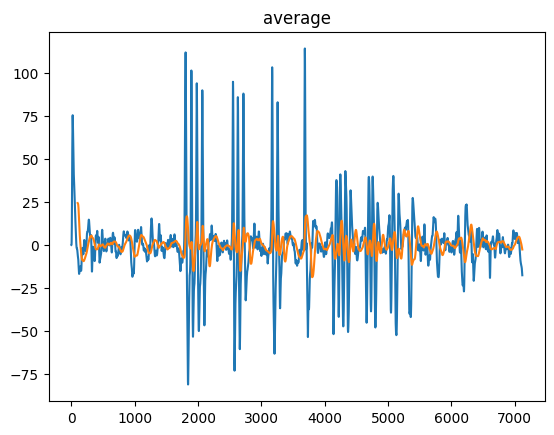

In [ ]:
def average (data,dara_before, average_lenght): #,data2
    data = pd.DataFrame(data)
    average=data.rolling(window=average_lenght).mean()

    plt.title("average")
    plt.plot(dara_before)
    plt.plot(average)
  #  plt.legend(['Row data',graph], loc='upper left')
    plt.show()

average_lenght = 100
average(dataset_y[0], dataset_y[0], average_lenght)





### Gaussian

### Median

<ipython-input-28-9bc09dbcc540>:3: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  ascent = misc.ascent()


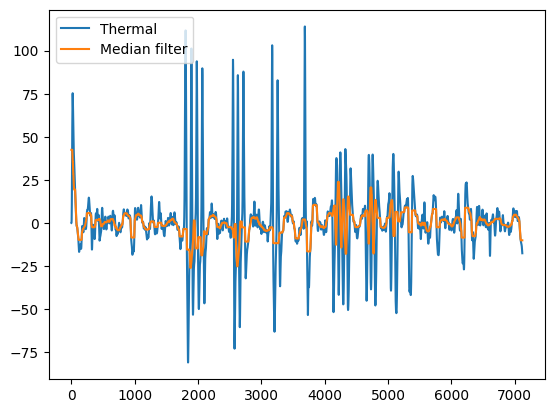

In [ ]:
from scipy import ndimage, misc
def median_filter(data1,data2):
    ascent = misc.ascent()
    result = ndimage.median_filter(data1, size=100)
    plt.plot(data2)
    plt.plot(result)
    plt.legend(['Thermal', 'Median filter'], loc='upper left')
   # plt.xlim([0, 50000])
    plt.show()
median_filter(np.array(dataset_y[0]), np.array(dataset_y[0]))


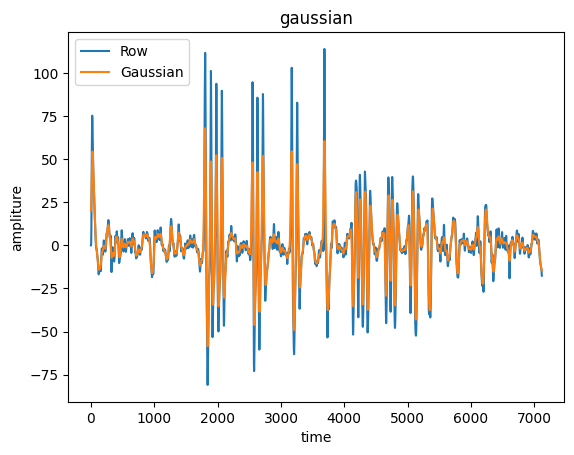

In [ ]:
from scipy.ndimage import gaussian_filter1d
def gaussian (data1):
    gaussian = gaussian_filter1d(data1, 10)
    plt.title("gaussian")
    plt.xlabel("time")
    plt.ylabel("ampliture")
    plt.plot(data1)
    plt.plot(gaussian[:10000],label='Second Line')
    plt.legend(["Row","Gaussian"], loc='upper left')
    plt.show()

gaussian(dataset_y[0])

## Baseline

# Frequently method

## FFR

phase_rad 0.0


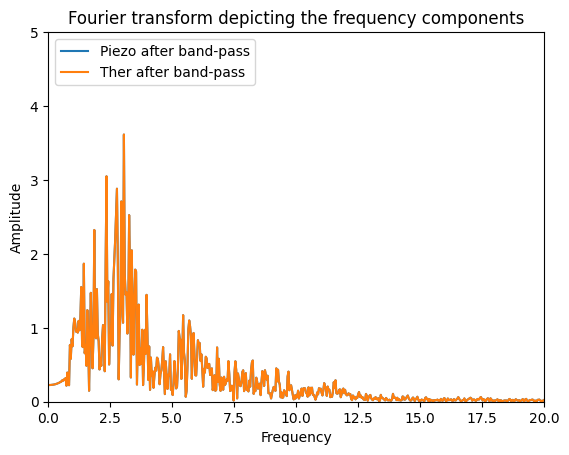

In [ ]:
#4.Fast_furier
def Fast_furier(data1, data2):
    figure, axis = plt.subplots(1, 1)
    plt.subplots_adjust(hspace=1)
    axis.set_title('Fourier transform depicting the frequency components')
    axis.set_xlabel('Frequency')
    axis.set_ylabel('Amplitude')
    angel=[]
    for data in (data1, data2):
        fourierTransform = np.fft.fft(data)/(len(data))
        fourierTransform = fourierTransform[range(int(len(data)/2))]
        tpCount     = len(data)
        values      = np.arange(int(tpCount/2))
        timePeriod  = tpCount/fps
        frequencies = values/timePeriod
        axis.plot(frequencies, abs(fourierTransform))
        angel.append(fourierTransform[2])
    phase_rad = np.angle(angel[0]/angel[1])
    plt.legend(['Piezo after band-pass', 'Ther after band-pass'], loc='upper left')
    print ("phase_rad", phase_rad)
    axis.axis([0, 20, 0, 5])

    plt.show()
Fast_furier(dataset_y[0], dataset_y[0])

### Wavelet heat map

## Wavelet

# New Section

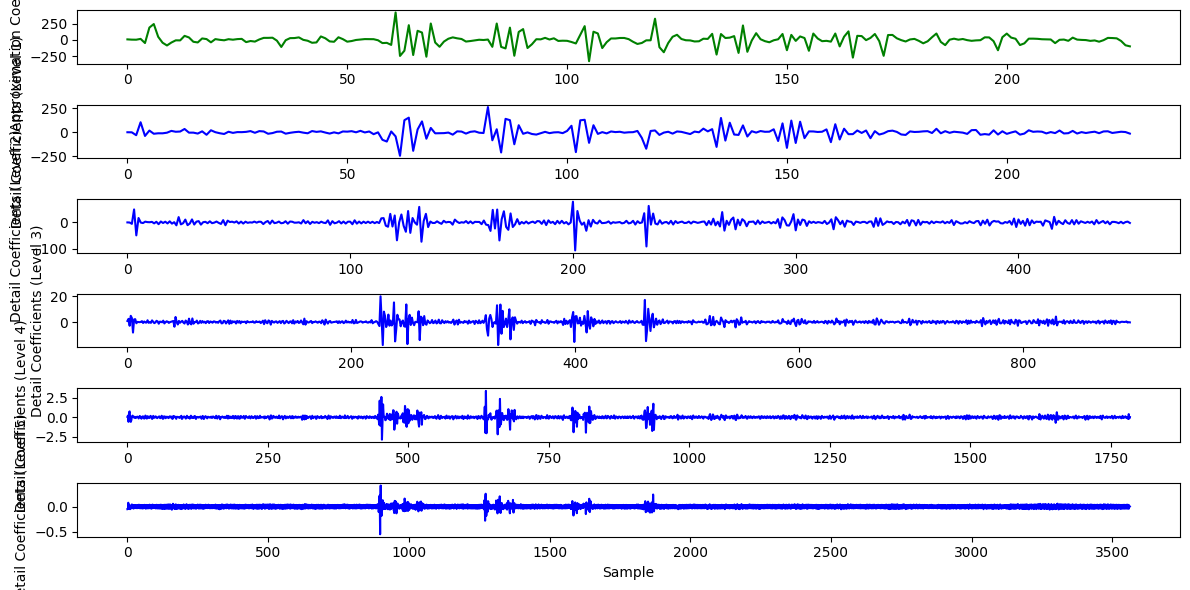

[]

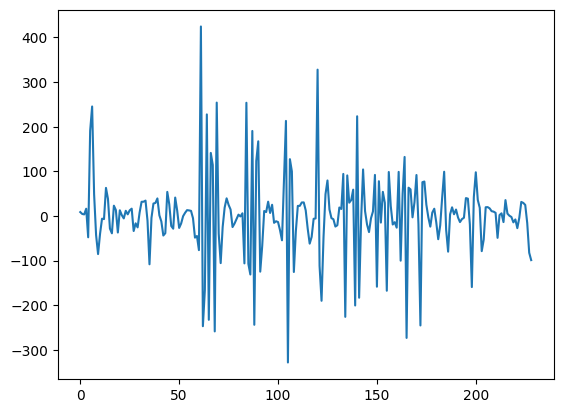

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load EEG data
eeg_data= dataset_y[0]#  np.loadtxt('eeg_data.txt')

# Define wavelet function and decomposition level
wavelet = 'db4'
level = 5

# Perform DWT on EEG data
coeffs = pywt.wavedec(eeg_data, wavelet, level=level)

# Plot DWT coefficients
fig, axs = plt.subplots(level+1, 1, figsize=(12, 6))

# Plot approximation coefficients
axs[0].plot(coeffs[0], 'g')
axs[0].set_ylabel('Approximation Coefficients')

# Plot detail coefficients
for i, detail_coeffs in enumerate(coeffs[1:]):
    axs[i+1].plot(detail_coeffs, 'b')
    axs[i+1].set_ylabel('Detail Coefficients (Level {})'.format(i+1))

# Add x-axis label to last plot
axs[-1].set_xlabel('Sample')
plt.tight_layout()
plt.show()

plt.plot(coeffs[0])
plt.plot()

3.Preprocessing

peaks [[[20, 2656.410558426724], [242, 316.107707717899], [358, 136.24551817835922], [487, 158.856112024353], [617, 17.752146416930167], [637, 34.30506696764397], [677, 77.53624349982067], [752, -46.944634731144134], [812, -48.61239989760496], [922, 233.05021987862452], [942, 212.59224449092912], [1141, 703.235079156311]], [[135, -501.30992901506204], [330, -188.13693558278186], [440, -160.50277423785485], [584, -74.90255235287383], [625, 7.577766226781735], [645, 27.96460562624056], [740, -55.03395825144297], [795, -119.65716345464108], [829, -81.21044198418325], [934, 202.28461856747205], [1050, -441.8232574186678]]]
[[[0, 0]], [[20, 2656.410558426724], [242, 316.107707717899], [358, 136.24551817835922], [487, 158.856112024353], [617, 17.752146416930167], [637, 34.30506696764397], [677, 77.53624349982067], [752, -46.944634731144134], [812, -48.61239989760496], [922, 233.05021987862452], [942, 212.59224449092912], [1141, 703.235079156311]], [[135, -501.30992901506204], [330, -188.1369

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


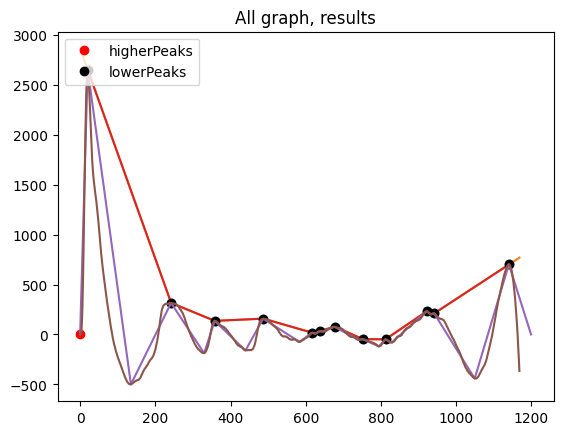

peaks [[[20, 2611.1925853001317], [207, 141.84919238159077], [292, 260.8228263328807], [407, 110.72217328641467], [427, 104.98750417443962], [502, -18.015386968904558], [537, -1.8397177584728468], [582, 18.38384848772207], [607, 31.544679112875563], [632, 44.92949945419919], [657, 37.28148792109778], [682, 19.360783900729984], [702, 22.113544517516768], [752, -37.07403535168187], [792, -66.88878875443432], [812, -76.65551210550993], [927, 235.33542859988347], [1138, 686.9568265491426]], [[135, -537.1092789826805], [254, -67.17406863144154], [379, -205.7422775753792], [419, 94.68135396673063], [464, -58.7376440813708], [514, -35.29467890439185], [549, -9.941319764855868], [590, 6.429290060213474], [615, 19.065905257299402], [645, 25.171547688145807], [675, 14.070122419402292], [690, 9.832615460685728], [744, -44.87018975143063], [780, -79.3528479793815], [805, -83.82805142215597], [820, -84.24037900783422], [1054, -462.0685444469034]]]
[[[0, 0]], [[20, 2611.1925853001317], [207, 141.849

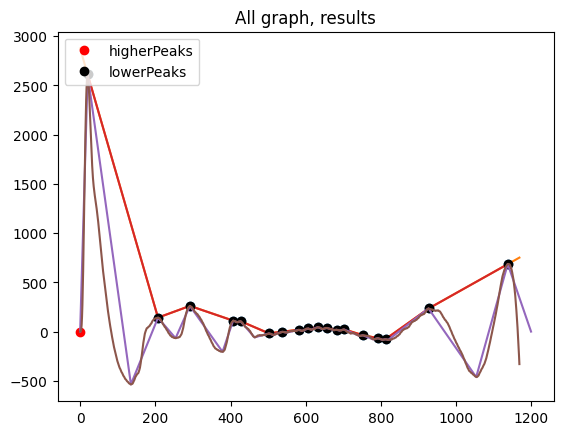

peaks [[[20, 2547.1294106492646], [212, 161.2281713014923], [297, 202.92509263341498], [402, 76.80690165836678], [422, 82.33831137613195], [487, -8.294206154136779], [502, -10.72821613332063], [522, -3.846696258822627], [557, -5.058931456826174], [582, 14.256004696087986], [602, 27.171743556925076], [622, 24.049832294422956], [647, 50.18758579009456], [677, 41.022893692763155], [702, 49.53210618370543], [932, 235.02864722818714], [1142, 670.26079427179]], [[144, -507.161896572426], [264, -2.5845132062928067], [364, -185.45767332103105], [410, 55.848265684445806], [465, -34.86601109197378], [494, -16.705659688832988], [510, -17.322830969655275], [544, -33.94432063029625], [565, -11.89400906181776], [590, 4.58761329807878], [615, 12.556826708386447], [634, 10.833074073049904], [660, 19.375673786340474], [689, 23.626933112664602], [799, -108.3009999734593], [1054, -434.7890894288478]]]
[[[0, 0]], [[20, 2547.1294106492646], [212, 161.2281713014923], [297, 202.92509263341498], [402, 76.8069

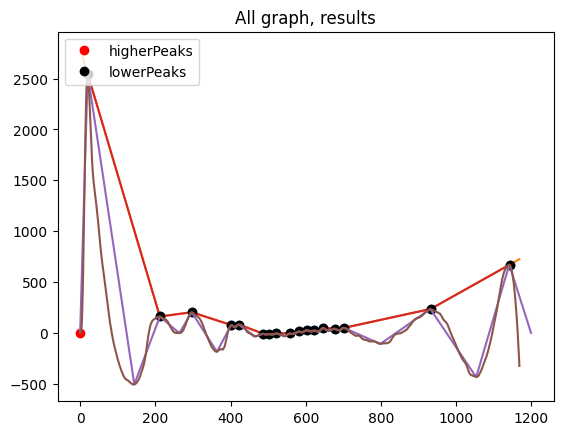

peaks [[[20, 2529.3129883379224], [213, 183.94515983670536], [302, 201.08133197688306], [397, 103.39539515502454], [507, 67.12711446401691], [532, 55.52881519240099], [582, 3.22955112387064], [597, 6.212502827460897], [632, 17.737320240155704], [677, 25.048263348772025], [702, 22.080479337999726], [722, 13.640749076108575], [932, 212.39190636398172], [1142, 654.2033945060308]], [[134, -496.7472219600383], [278, -31.52073232980428], [360, -216.04566043012363], [464, -155.26660661847689], [524, 30.85647205719615], [570, -11.634479123279597], [589, -2.344531887306746], [605, -14.413955927421172], [649, 0.6491435634456397], [689, 11.669750090781436], [715, -2.5789964345426597], [805, -102.41187346189001], [1049, -422.1609544293673]]]
[[[0, 0]], [[20, 2529.3129883379224], [213, 183.94515983670536], [302, 201.08133197688306], [397, 103.39539515502454], [507, 67.12711446401691], [532, 55.52881519240099], [582, 3.22955112387064], [597, 6.212502827460897], [632, 17.737320240155704], [677, 25.04

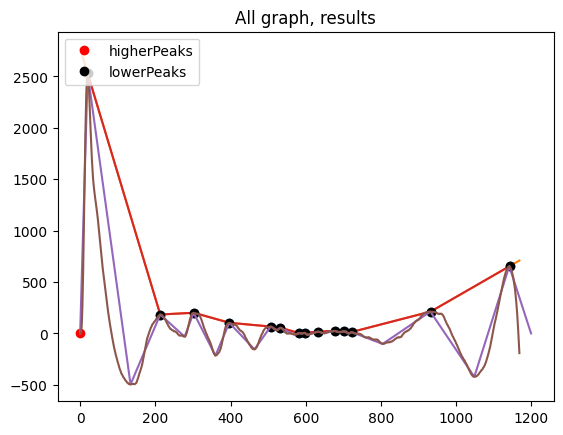

peaks [[[20, 2359.560193604771], [242, 286.13540525445774], [342, 103.35114420498907], [462, 125.7054997412886], [542, -27.142108512430426], [567, -14.203978082898786], [617, 36.67439350076757], [642, 26.875137573776104], [677, 38.86250816042192], [692, 41.673950101775525], [717, 20.909472975746464], [807, -67.96881402105511], [927, 200.86548847022928], [1142, 631.5302077488365]], [[135, -427.1540132260685], [310, -119.61062621279346], [419, -167.82479975847454], [529, -43.89919938384648], [554, -41.730954013633976], [579, -25.601133853093156], [629, -3.762908323996859], [654, 17.078326058442396], [684, 30.208719819333368], [709, 13.214110762903474], [794, -101.36634609527191], [824, -80.67905446974268], [1055, -420.0818163787846]]]
[[[0, 0]], [[20, 2359.560193604771], [242, 286.13540525445774], [342, 103.35114420498907], [462, 125.7054997412886], [542, -27.142108512430426], [567, -14.203978082898786], [617, 36.67439350076757], [642, 26.875137573776104], [677, 38.86250816042192], [692,

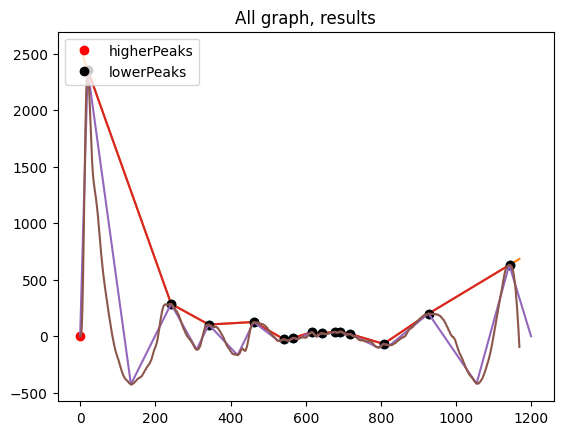

peaks [[[20, 2196.9826189587225], [182, -45.1732625259124], [267, 202.96140869376367], [357, 95.11639076800147], [446, -27.831631697635856], [482, 3.4699712919641956], [502, 12.363456025805576], [537, 29.446921253730675], [577, 7.515120017078284], [632, 21.087421864842113], [657, 39.748019910687304], [697, 23.762462513433597], [717, 21.68303983701804], [756, -16.445363171743296], [792, -52.41539755741157], [842, -52.25042710399007], [922, 182.1861893891628], [937, 185.73020825086377], [1147, 557.0720414833631]], [[120, -425.58513562354227], [204, -101.45132276491807], [334, -125.14644197317249], [414, -59.872761265687345], [459, -56.39298493208667], [489, -4.060027363894267], [509, 7.7088688398396386], [559, -8.700149106066723], [594, -10.07544254781536], [639, 14.091170358319552], [674, 10.437027782787863], [709, 16.230894879947236], [744, -34.70409267809853], [784, -59.438892552771854], [829, -100.06954539337049], [850, -65.81317306574095], [929, 172.79235778179873], [1054, -365.8248

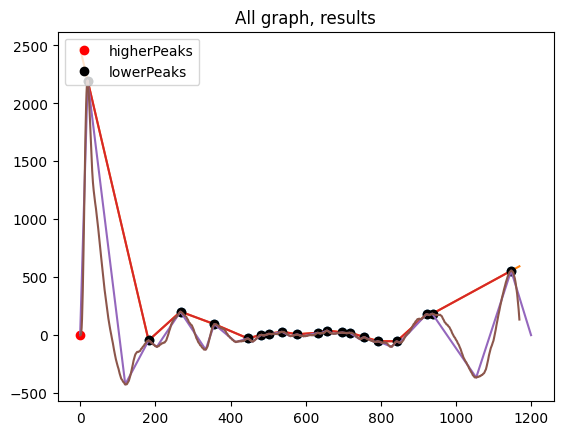

peaks [[[20, 1787.2528090556655], [112, -89.09423332694415], [167, -232.87876541934915], [231, 167.67800924780056], [316, 159.03746019013917], [417, -27.911255269526542], [437, -11.836181611553537], [467, 2.532921170815255], [507, 15.332939410483469], [527, 10.63253048268349], [547, 24.253676974802133], [582, 25.699027504269516], [601, 29.563004028291626], [636, 15.35221307564056], [657, 10.35446735828042], [687, 20.269172693715554], [707, 19.485425497225073], [732, 11.13727161961641], [762, -21.39361988744682], [922, 171.09495390127307], [936, 167.48795312346843], [956, 169.96195213498035], [1147, 535.6860204893994]], [[99, -162.35621324397965], [159, -249.2305921730733], [179, -274.37170582859153], [284, -52.981765103670185], [384, -79.04954108965275], [424, -36.2186999956071], [444, -18.613894833858964], [484, -21.06555925408385], [519, -3.2328255245959996], [534, 5.178587886436297], [559, -10.4913760732952], [589, 18.667206708536213], [619, -4.904813909802562], [649, -6.49878103506

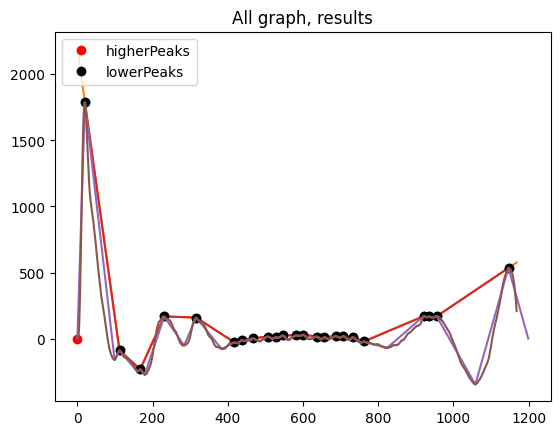

peaks [[[20, 1708.006911932042], [127, -76.67970063160142], [151, -71.62105481283368], [242, 152.7120625470352], [317, 120.72572753223157], [411, -42.660039302732194], [457, -3.834249705468628], [507, 29.78835271827348], [537, 13.111830176987855], [592, 7.467893167728468], [622, 18.287044948858156], [662, 35.51452085267888], [722, 18.901793174898902], [742, -1.3244540167758676], [786, -33.784850122656245], [811, -57.96684544749779], [836, -40.92425153002646], [931, 192.91951108411283], [952, 185.547040211111], [1147, 544.9271623702845]], [[110, -264.5861343855314], [139, -90.50771950253592], [189, -225.38769481039628], [294, -56.874451117870535], [398, -77.43729731118607], [419, -58.94789738289825], [469, -14.986876465935131], [524, 1.5788515628999702], [579, -11.754580423319847], [604, -2.482714668720062], [649, -3.38568286850508], [704, -6.886449536669772], [734, -8.24264910232836], [779, -41.75474567126753], [799, -64.63866119245235], [824, -73.35305505902595], [844, -59.73687265765

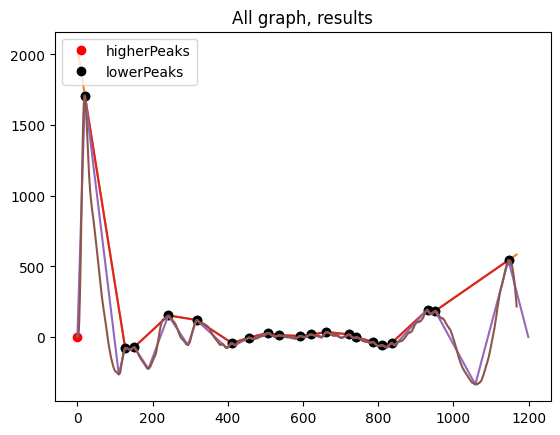

peaks [[[20, 1609.2293829456673], [181, 11.851310707237795], [265, 207.99853210380593], [367, 97.07781071605018], [451, -27.091429897580312], [486, -4.881631976619179], [511, 19.98760548692612], [532, 18.76086364623018], [566, 21.660169033527048], [606, 20.80899543224559], [636, 18.494942079953276], [671, 15.178828127176857], [701, 25.008474690976445], [786, -38.93921315497981], [817, -31.361265054834316], [941, 152.05339471786183], [961, 139.98385810579074]], [[119, -319.66222421943183], [209, -100.72036516089615], [334, -95.07445573173509], [429, -66.63712086695108], [469, -55.46419789006807], [494, -11.678929935476969], [519, -1.3569776762803873], [549, -0.37488318091186623], [589, -12.539535734818466], [624, 5.60238231637501], [649, -0.19706510573781444], [679, 9.386182203253068], [774, -49.77542768361701], [804, -61.652104952821915], [834, -56.00508627298745], [954, 134.16285150717536], [1074, -277.8928402522685]]]
[[[0, 0]], [[20, 1609.2293829456673], [181, 11.851310707237795], [

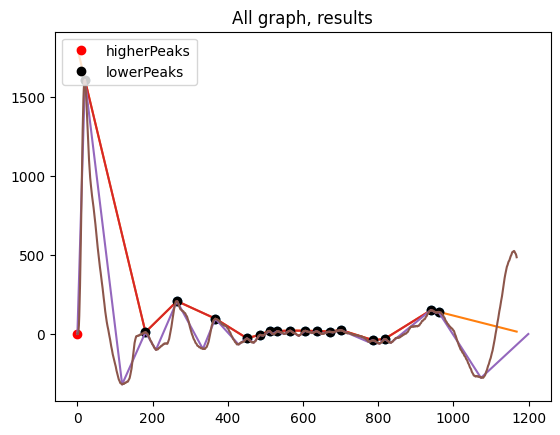

peaks [[[135, 502.4063150484194], [245, 85.2469992729479], [341, -171.69592117744176], [401, 298.1842195299209], [501, 157.86022259260255], [611, 174.93411241010824], [632, 165.43418919346712], [716, 43.10977739433351], [737, 1.9205017158202389], [832, -68.369880523019], [907, 235.53956236072312], [927, 270.97826033335036], [1141, 810.8665926083513]], [[20, -2478.691166489406], [223, -234.17621613571438], [328, -211.64304399633622], [354, -228.99810583630475], [468, -204.1129822018498], [574, -233.34415027097066], [624, 148.90385609638128], [679, -35.89922053166], [729, -8.833247201674883], [818, -139.98632840950322], [839, -84.51242300943967], [914, 218.23137552307875], [1054, -513.5515278156527]]]
[[[0, 0]], [[135, 502.4063150484194], [245, 85.2469992729479], [341, -171.69592117744176], [401, 298.1842195299209], [501, 157.86022259260255], [611, 174.93411241010824], [632, 165.43418919346712], [716, 43.10977739433351], [737, 1.9205017158202389], [832, -68.369880523019], [907, 235.53956

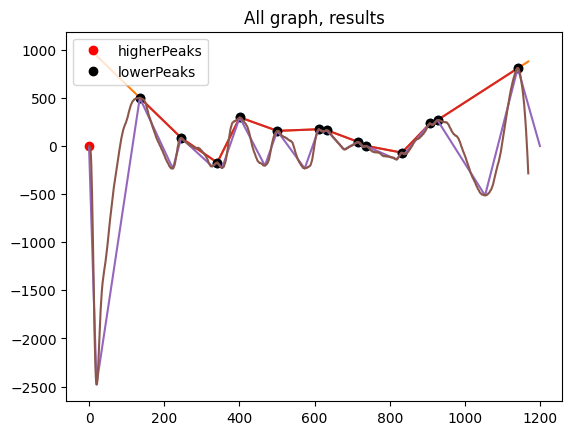

peaks [[[20, 3046.099308890649], [228, 265.5944412893468], [313, 146.130158128989], [433, 116.55099590668283], [452, 121.88232311395083], [478, 76.01375109807184], [557, 134.49292924247686], [578, 145.75740207431664], [673, -19.238336363199853], [723, 12.501763895327942], [748, 13.722492970039276], [773, 3.6647102785662957], [803, 29.16793280800804], [833, 64.74305943556173], [858, 45.187275587406354], [893, 20.137309801019164], [918, 26.031042751924247], [1093, 260.35460365911615]], [[130, -607.7107559555011], [275, -30.54241517370092], [396, -225.76376099986783], [441, 104.62029742942414], [470, 63.27693870016361], [515, -142.30811185349495], [565, 126.95837843567278], [660, -71.01752876660068], [690, -54.07468346700755], [736, -2.027810390864031], [760, -13.806707105525534], [785, -7.637491637393306], [816, 3.5645965630346983], [850, 25.659739103201815], [886, 9.508840719855158], [901, 11.27151531259882], [1001, -107.92879831328958]]]
[[[0, 0]], [[20, 3046.099308890649], [228, 265.5

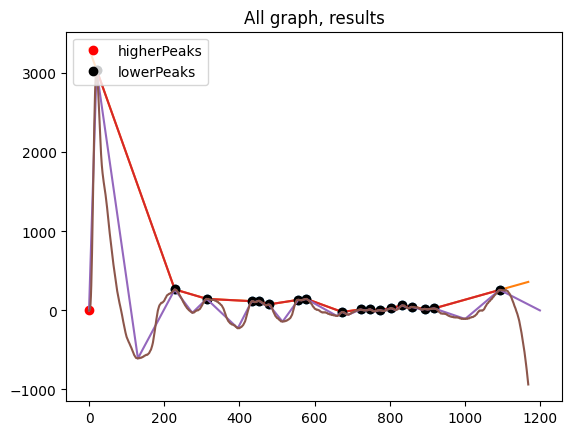

peaks [[[24, 137.4283712420086], [79, -60.03951862887273], [109, -127.78387913260744], [170, 214.70123349528336], [288, 126.73645603419007], [309, 104.33481654863004], [399, 159.38909920997335], [519, 82.94540451418979], [540, 103.17667417517059], [594, 22.723479614534178], [674, -63.233241164999384], [779, 128.33156924394856], [799, 128.07170620404824], [1049, 512.7611870930828]], [[10, -96.37244210818743], [71, -67.58444929825707], [101, -133.57347406871006], [141, -158.52434297745674], [246, -174.4112777743655], [301, 90.37899220094833], [361, -146.12650846984397], [491, -140.51164324680406], [527, 66.0581238453499], [587, 15.268376198941018], [657, -85.36029924186712], [687, -77.63426744045421], [787, 115.65047436165999], [932, -300.40267632495], [1137, -825.9545088317165]]]
[[[0, 0]], [[24, 137.4283712420086], [79, -60.03951862887273], [109, -127.78387913260744], [170, 214.70123349528336], [288, 126.73645603419007], [309, 104.33481654863004], [399, 159.38909920997335], [519, 82.94

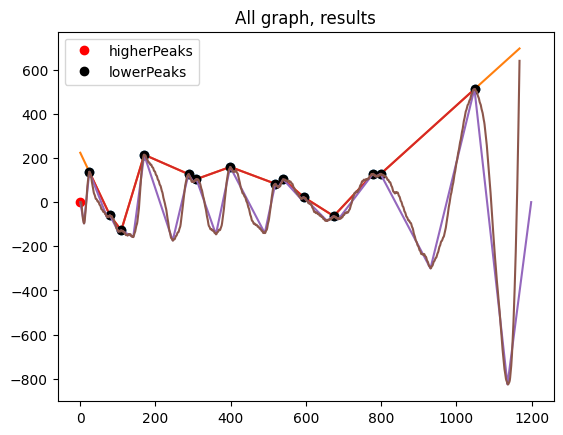

peaks [[[125, 512.7455840929978], [209, 199.13341893777167], [284, -244.61190248629433], [350, 193.3909104982894], [451, 210.02329058932528], [510, -73.57173448346965], [580, 78.01020820053087], [641, 0.8636663247872287], [676, -17.610880279072667], [701, 18.390688573480357], [746, 33.823897494051636], [796, 44.35640528236437], [821, 35.77676137059489], [861, -27.17366428532165], [900, -71.84853130126625], [1021, 174.17745087030224]], [[20, -3103.1588920903346], [188, 0.47805119350945524], [272, -296.1505863323953], [293, -260.5736833027282], [427, -111.34745602130184], [503, -84.92058893016144], [542, -131.11419073652684], [628, -41.11508866145246], [663, -38.99818129307362], [683, -26.055510573569872], [718, 10.041714076055523], [768, 10.868473839998325], [813, 18.79732768977486], [848, -44.009271927760295], [888, -85.96201963958565], [912, -104.90127889366688], [1118, -335.7906590708414]]]
[[[0, 0]], [[125, 512.7455840929978], [209, 199.13341893777167], [284, -244.61190248629433], [

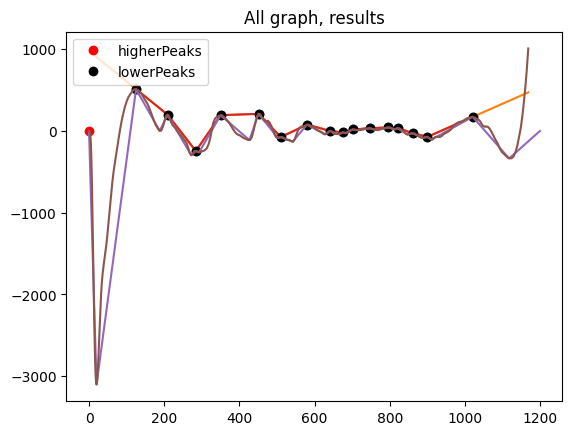

peaks [[[126, 196.38643129006618], [247, 155.9004860746111], [336, -178.87344813182267], [376, 236.28282428224043], [391, 218.35644291892058], [492, 145.44742177417672], [561, -105.03202443234692], [606, 103.02796149773641], [651, 34.586982464664075], [686, 36.59153864113073], [711, 19.53104272258472], [796, -58.45999138076387], [816, -62.40330817238786], [846, -25.50673679275406], [907, 141.8283547121653], [951, 182.22160981855438], [1151, 574.5550586910897]], [[22, -808.7176240563116], [223, -161.14138670094985], [328, -188.9973616939866], [343, -189.53169090978494], [384, 205.48436891285056], [458, -170.61569217842225], [549, -121.24527604224043], [578, -116.19756703348372], [644, 22.701958740031596], [669, 5.703268662424713], [699, -1.1579139058086187], [789, -63.43144449391017], [809, -72.57165495524131], [829, -73.20373799313235], [854, -34.54248445229301], [914, 133.02937320954138], [1064, -357.0066941541149]]]
[[[0, 0]], [[126, 196.38643129006618], [247, 155.9004860746111], [33

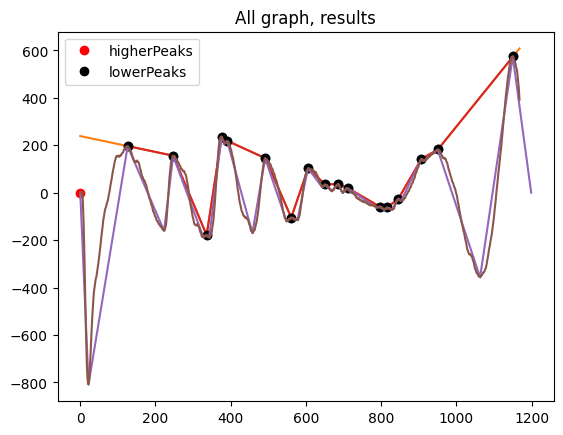

peaks [[[19, 1605.9414139497494], [207, -121.71278149029675], [248, 330.7852045515725], [266, 302.7987376729279], [361, 138.17929862553842], [491, 192.29833830641408], [597, 148.30236421415765], [612, 140.0543936930916], [682, 15.722694134536283], [702, 7.942634085679422], [747, -24.705631867437923], [777, -70.62500752683103], [822, -66.36222056733153], [922, 250.9175936529096], [942, 258.59464382287604], [1137, 801.2584650480854]], [[134, -256.299249809456], [214, -128.85671594656392], [259, 290.19212740579127], [335, -219.71740998842745], [459, -172.80748423500006], [565, -173.24766948417053], [604, 127.92143127564238], [664, -16.962114729870034], [694, -2.2210531738872468], [739, -47.53783376854731], [769, -77.46569560961218], [804, -104.8934799552985], [829, -72.32355572994386], [930, 240.45695059683095], [1045, -489.63803222868404]]]
[[[0, 0]], [[19, 1605.9414139497494], [207, -121.71278149029675], [248, 330.7852045515725], [266, 302.7987376729279], [361, 138.17929862553842], [491

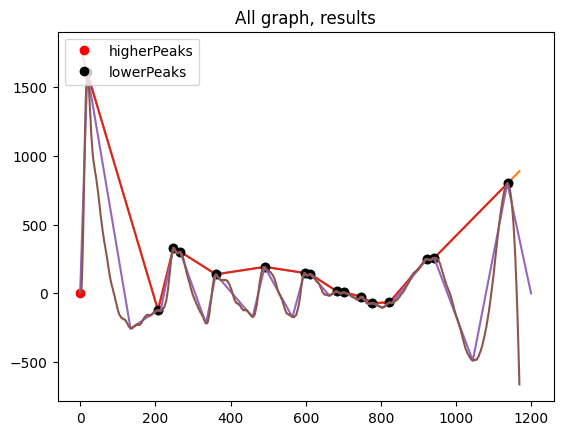

peaks [[[20, 3060.2469186035437], [217, 170.90032170461274], [303, 221.79205051555613], [408, 53.26173274616798], [433, 51.0523815705135], [518, 138.76423655171303], [583, -18.635066179151867], [628, 19.20932155278525], [648, 14.033156051267015], [683, 20.980156518578124], [723, -15.805221310215465], [743, -6.4349315125661946], [773, 15.172534048401786], [828, 26.091675849028114], [883, 67.49640374042359], [913, 80.85342734396762], [1113, 312.2556482521655]], [[135, -632.881983430758], [275, 26.87179248434596], [371, -200.26418744683568], [425, 33.94844282005009], [470, -85.40670845106173], [570, -36.433053220236], [591, -39.21027314547585], [640, 2.6765899483912836], [665, -6.102549736895539], [711, -23.528524425171174], [730, -27.883421679981964], [756, -36.957501361174025], [790, -35.23555420280765], [851, -2.095867256018831], [891, 56.65545229913292], [1021, -171.903299814775]]]
[[[0, 0]], [[20, 3060.2469186035437], [217, 170.90032170461274], [303, 221.79205051555613], [408, 53.261

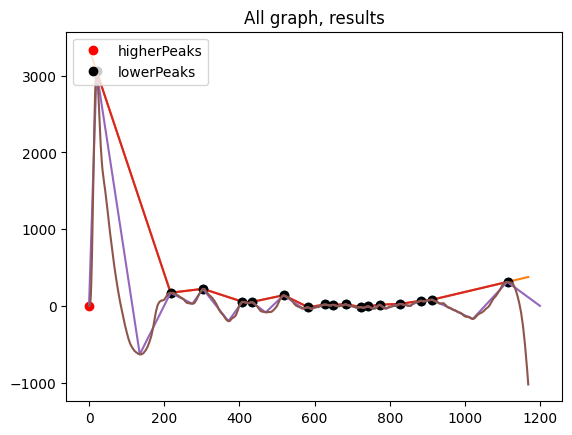

peaks [[[21, 919.3628051484045], [139, 48.55589444069708], [159, 21.82120711137622], [199, -95.92610655276904], [248, 193.28028137044572], [344, 90.98788111337653], [463, 97.2008864424828], [523, 2.013265921845337], [559, 2.634510557129466], [583, 25.721780320813554], [613, 2.308397225502377], [648, 14.684547069666367], [678, 22.278109834803555], [704, 7.353899459832406], [728, -6.194815225278385], [769, 6.504169309444249], [804, 60.79908129633047], [828, 92.42375811111258], [848, 71.67672484620297], [933, -107.08249080880562], [1069, 253.72164399619675]], [[112, -300.8043281660339], [151, 4.006152256880297], [191, -107.23269703547209], [211, -111.6311794654948], [316, -125.16936794448445], [421, -131.90119397559346], [511, -17.41345194636245], [541, -25.304918865393056], [566, -11.742851652981704], [601, -23.38913224893734], [636, -26.59621822192558], [661, -7.240939027465098], [691, -9.027894858887542], [716, -30.09447818773948], [756, -40.679772745913255], [781, -8.386641836068105],

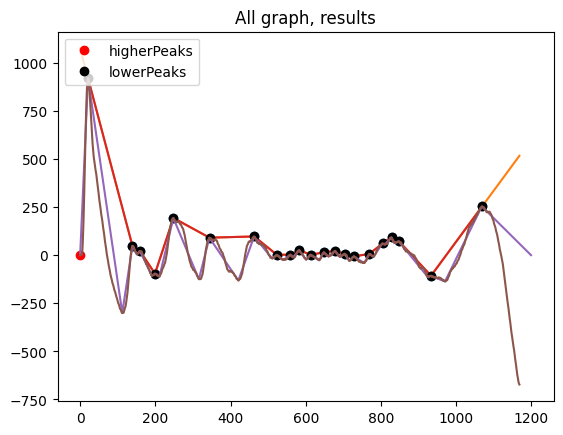

peaks [[[150, 347.8783662104978], [249, 56.67760651346358], [363, 142.08691434260996], [439, -86.82144586638844], [478, 123.03220567899254], [549, -18.228011585990682], [574, 14.980757538662775], [594, -7.341537102976008], [634, 16.546666400214345], [659, -8.293710356046589], [683, -10.879104511274793], [744, 37.90348950318879], [784, 99.0189391605018], [809, 88.59418079772587], [839, 73.54423492409548], [1059, 415.95229312791986]], [[18, -828.4687222036579], [221, -169.15417985329046], [321, -122.49760434236624], [431, -100.0302084702297], [447, -95.9253654862138], [536, -31.069173155235383], [557, -33.80215341927984], [586, -21.33370368501243], [617, -22.006602095714012], [651, -17.671386728966755], [672, -32.40898661635955], [701, -45.83974231300619], [752, 30.507409559134405], [797, 73.30562315107893], [827, 60.27143681664534], [941, -226.5916098010715], [1142, -652.1423130834969]]]
[[[0, 0]], [[150, 347.8783662104978], [249, 56.67760651346358], [363, 142.08691434260996], [439, -86

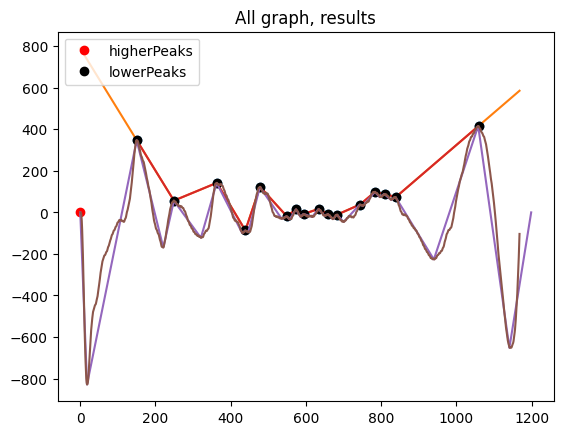

peaks [[[20, 2761.4909567528025], [181, 59.93643345091043], [202, 60.71092004434156], [246, 244.55181898049045], [297, 163.81957288471148], [357, 98.25558059490066], [422, -94.8384596277308], [496, 231.95970545787225], [562, 44.73077974855219], [627, 114.75819791731033], [702, -8.882977351805843], [777, 151.75026854338645], [836, 59.35926513041777], [916, 307.11270805171387], [962, 150.20054415342562], [1146, 581.3099083296047]], [[140, -573.8210565616658], [189, 42.48002405372072], [219, -39.47844128602612], [279, 14.745798995620667], [325, -67.64177577567122], [410, -111.13904550035873], [449, -123.86346344429496], [540, -104.02507053381886], [593, -106.86755308145776], [679, -31.911955879967227], [744, -77.62138014066001], [810, -165.99697974024704], [870, -145.11913501253676], [949, 115.02430930298485], [1049, -351.52783700134563]]]
[[[0, 0]], [[20, 2761.4909567528025], [181, 59.93643345091043], [202, 60.71092004434156], [246, 244.55181898049045], [297, 163.81957288471148], [357, 9

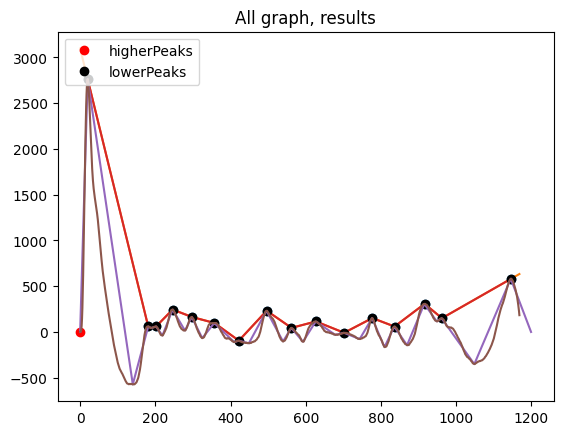

peaks [[[20, 1553.1636018926495], [182, 176.88262310465302], [237, 93.01795063551106], [301, 121.10296350445218], [356, 67.48129694878732], [381, 24.678133580656457], [407, 23.802022423997585], [451, 7.175380192541296], [541, 202.56006933114094], [597, 31.784925553027552], [676, 99.64088317553792], [726, -2.6118314637513906], [751, 37.77084995736697], [855, 78.69374172282153], [931, 78.8821825193082], [976, 125.8100213106169], [997, 145.16377515638], [1107, -38.408545018685054]], [[134, -343.07244264280763], [214, -72.53432616456818], [264, -47.13201034920154], [340, -110.94137587634116], [368, -13.318388976703606], [394, -43.22128217777196], [434, -31.903815006265695], [504, -99.9193631524306], [580, -94.77826544431181], [629, -145.17443841361626], [709, -14.313220163627474], [734, -10.697333794305656], [829, -101.49146703269072], [889, -129.84977578325245], [949, -0.04625833932655371], [988, 113.03278753096417], [1088, -319.9106001673446], [1117, -61.369018209287084]]]
[[[0, 0]], [[2

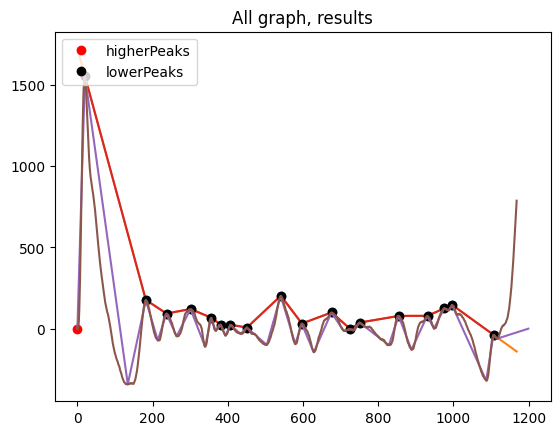

peaks [[[125, 207.81864476280052], [220, 143.87951093844268], [276, 33.46753322709157], [345, 46.07757658361065], [396, 129.7426568694632], [419, 154.95290317837944], [455, 19.244902955003795], [480, 7.5466778527597365], [510, -34.63761855227289], [560, -36.04061098967824], [604, 193.85544710368953], [659, 64.37234013456042], [730, 68.64724109817111], [775, 69.37866029157594], [810, 58.86381548319636], [894, -14.469253701613306], [965, 43.093369970708665], [1035, 272.5493033693214], [1081, 312.3576405826242]], [[21, -841.4382194862126], [199, -81.97369848534112], [252, -146.41038315674928], [307, -169.60086580546428], [372, -121.61554918851265], [403, 118.65742939499816], [443, -3.0321524890300386], [468, -8.048879338565296], [503, -44.978345366686526], [538, -96.99933874228276], [583, -67.79773378393247], [639, -88.12207234879793], [688, -118.05191310524832], [753, 7.837442772230923], [797, 34.890054757234644], [874, -114.88886586685338], [923, -300.4019190391953], [983, -2.3432368123

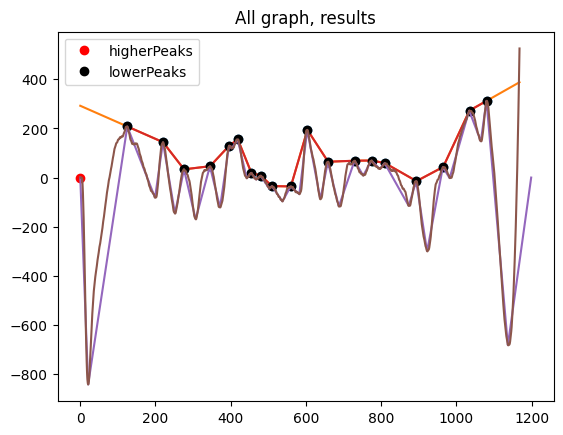

peaks [[[125, 379.9099705386577], [165, 431.57044278525], [235, -91.40635790058403], [304, -62.145791186533245], [369, 189.7255913870856], [439, -16.591123902654793], [519, 96.11796836791865], [568, 139.34539420866435], [625, 87.43077310490864], [714, -41.14427994539949], [739, -23.077158883957583], [759, -26.249749059185103], [809, 196.10166010132122], [863, 157.74990995726924], [923, -188.635146013091], [994, 178.81515833428162], [1013, 182.98803753573463], [1084, 177.0547458212104]], [[20, -2546.171430800097], [152, 330.1504435096072], [222, -149.9367377802383], [276, -307.7447772922137], [322, -97.52676550106175], [432, -24.144320606163774], [486, -133.4801366446521], [547, -28.599837104429113], [602, -74.11592205052706], [697, -77.49508787933603], [727, -53.954344840965646], [747, -47.83234209815901], [782, -50.67012736916622], [841, 11.291733449323516], [912, -202.17143641664433], [946, -269.45881031705187], [1001, 169.05826273397045], [1046, 114.75448129603554]]]
[[[0, 0]], [[12

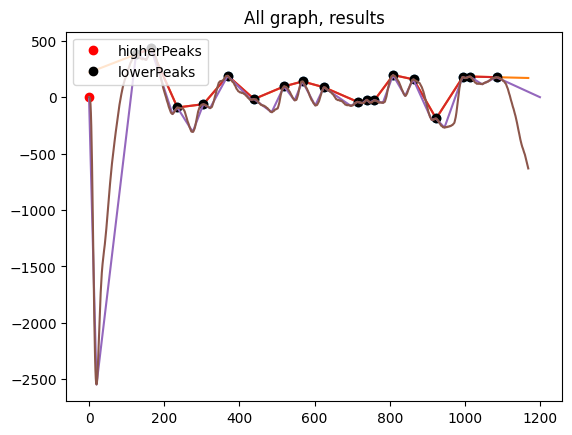

peaks [[[29, -144.32414294892826], [99, -28.064225787431095], [173, 241.91022794040987], [245, 159.62646986195912], [295, 297.84071393072765], [373, 176.84042108043687], [423, 5.080294340140762], [439, 17.962815198541218], [463, -29.993293391007104], [524, 111.51607220835811], [592, 67.09816658712559], [658, 136.6978070370737], [698, 58.29025933661407], [828, 193.80305393791284], [889, 330.7786911333193], [903, 332.8907649843111], [1118, 395.78571055832]], [[15, -212.86204412833413], [36, -160.36599347786358], [141, -181.73194027705068], [221, -172.8435630421053], [272, -102.29977834955783], [331, -307.682802836184], [416, -1.3511879856782605], [431, -3.775242497516354], [456, -35.514485315595444], [501, -118.91229850206149], [566, -58.101330393247615], [620, -109.69244956793239], [690, 48.8786173155338], [805, -242.95129463050637], [864, -55.70899108802324], [896, 322.7590114098195], [1030, -408.48037036003166]]]
[[[0, 0]], [[29, -144.32414294892826], [99, -28.064225787431095], [173, 

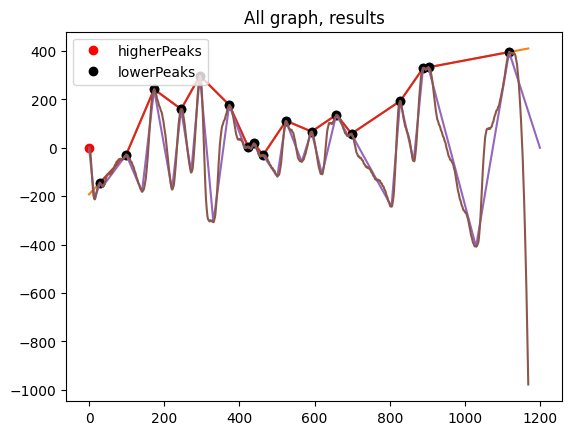

peaks [[[20, 1814.353391659035], [158, 29.843803726549023], [208, 78.28553557127655], [257, 148.95479588459517], [304, 127.78547127157574], [398, -28.70054487898151], [438, -78.86743414923738], [482, 111.00799429821237], [542, 43.20797414407677], [582, 54.50578423756724], [602, 65.53610044373833], [658, -39.003151102228614], [722, 233.1714387928858], [792, 17.17667588997658], [907, 293.8971792782923], [927, 281.38121555567716], [1138, 692.0982451039865]], [[125, -475.28941893284576], [186, -163.69369633186818], [231, -63.5419615392], [286, -0.9791134304476357], [385, -48.121288308581555], [425, -96.96834091746798], [445, -90.1278702285381], [520, -47.23391856048218], [560, -4.809588389630839], [590, 41.16439462077831], [651, -51.182385699581], [690, -166.72883773555236], [765, -75.04402437628924], [835, -202.97731926516695], [919, 268.29905243132134], [1060, -456.10780853386785]]]
[[[0, 0]], [[20, 1814.353391659035], [158, 29.843803726549023], [208, 78.28553557127655], [257, 148.954795

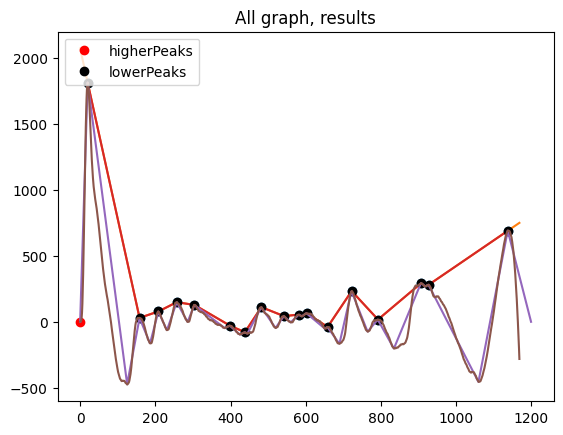

peaks [[[20, 2340.94770256421], [136, -104.38983523491913], [197, 21.389165005221013], [241, 159.78165199798934], [292, 151.48548686769288], [372, -41.13735032494972], [401, -62.363179939688514], [431, -39.20732883166695], [467, 127.00321375326197], [521, 8.025138909327678], [591, 109.02148284536813], [626, 62.33798805468129], [746, 202.15582674182156], [805, 249.77077267979308], [896, -205.97257036583719], [951, 197.57940112141407], [975, 193.54657234352518], [1005, 145.48841660592797], [1026, 114.57963953684988]], [[113, -484.8310249909937], [165, -314.2298341821675], [214, -89.75187559255963], [269, 36.9322941226736], [359, -76.8822980614689], [384, -92.61212535802879], [409, -69.99900426739055], [443, -59.2855262364349], [504, -48.58786168959666], [549, -92.44709734747848], [619, 57.029565838597144], [719, -258.26739132667603], [784, 53.15476317550092], [888, -212.96846774694737], [904, -216.3904072040647], [963, 153.74588610722958], [989, 111.82755686282276], [1018, 105.7164554590

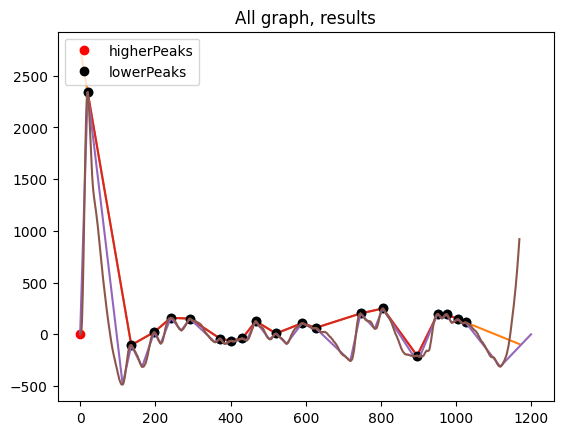

peaks [[[133, 576.6522959873465], [200, -60.80250214918751], [241, -105.43831845737826], [260, -88.2047517495846], [300, 81.51682995674982], [326, 86.28086244341361], [462, 212.87328663534836], [515, 50.426625077962065], [595, 87.65756059338901], [625, -7.809713901379982], [650, -7.04274798979195], [735, 101.93549767339933], [790, 219.23770782583978], [960, 20.589118225100307], [1050, 408.0407543904585]], [[21, -1018.7137402310939], [189, -89.46994796760656], [224, -201.91534446085745], [248, -114.00404117814341], [268, -113.46292582332184], [313, 72.87686946563328], [428, -134.00153479859318], [498, -43.35450379997296], [552, -89.95434582537253], [613, -27.80352772582554], [643, -19.143689531387167], [698, -125.06494660860628], [767, 30.893525691833702], [912, -418.81194612921263], [977, -26.876772340857222], [1137, -645.0050061422714]]]
[[[0, 0]], [[133, 576.6522959873465], [200, -60.80250214918751], [241, -105.43831845737826], [260, -88.2047517495846], [300, 81.51682995674982], [326

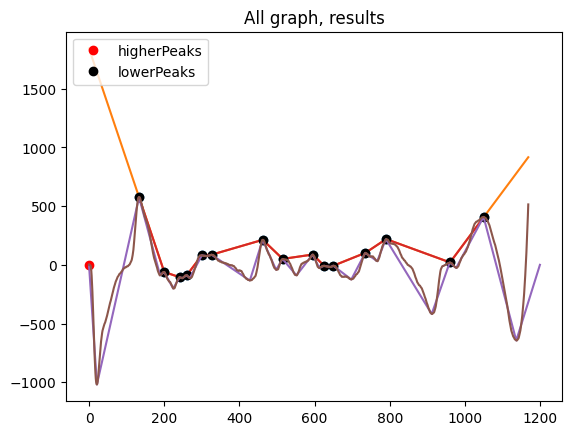

peaks [[[129, 393.3994321627085], [169, 431.9865565271237], [229, -64.70590680440421], [294, -124.79137604276123], [363, 226.53733749359577], [514, 103.5804146967606], [574, 88.357694650894], [628, 81.39867152505153], [680, -17.01890677979008], [714, -66.0093736539854], [798, 158.97805729039817], [843, 174.2195586704483], [998, 202.5665152691347], [1019, 193.24251577840104], [1089, 156.64479576768346]], [[20, -2510.5847526441844], [147, 310.49829965042727], [217, -94.68595850117856], [262, -260.3625008949845], [311, -162.29514682794326], [482, -164.91715271913367], [556, -24.853646076493163], [606, -53.90857673198241], [671, -38.98084407043726], [707, -72.98916251140935], [732, -95.24932397087305], [822, -15.201530102867846], [966, -299.1293416307172], [1007, 172.9785568048471], [1046, 118.26924883640677]]]
[[[0, 0]], [[129, 393.3994321627085], [169, 431.9865565271237], [229, -64.70590680440421], [294, -124.79137604276123], [363, 226.53733749359577], [514, 103.5804146967606], [574, 88.

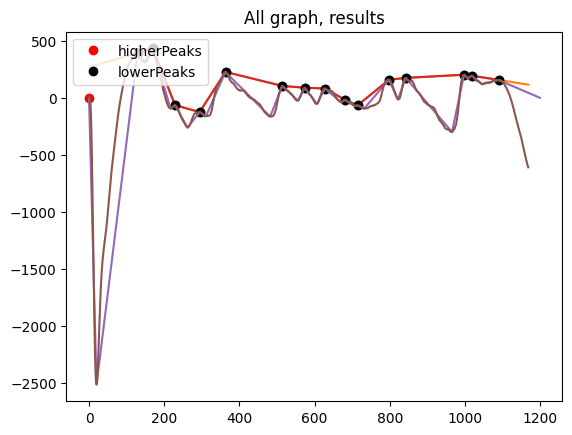

In [ ]:

def detect_peak(x,a):
    peaks = peakdetect(x, lookahead=10)
    print ("peaks", peaks)
    peaks.insert(0, [[0, 0]])
    peaks.append([[1200, 0]])

    print(peaks)
    higherPeaks = np.array(peaks[0])
    lowerPeaks = np.array(peaks[1])

    #3.1 Interpolation High peak
    f_high = spi.interp1d(np.array(higherPeaks[:,0]), np.array(higherPeaks[:,1]),fill_value="extrapolate")
    x_new = np.array(list(range(0,len(x),1)))

   # tester = spi.interp1d(np.array(peaks),fill_value="extrapolate")
   # plt.plot(tester)
   # plt.show()

    print ("ok2")
    y_high_inter = ynew = f_high(x_new)   # use interpolation function returned by `interp1d`
    #plt.plot(higherPeaks[:,0],  higherPeaks[:,1], 'o', x_new, ynew, '-')
    #plt.show()
    #3.2 Interpolation High peak

    f_low = spi.interp1d(np.array(lowerPeaks[:,0]), np.array(lowerPeaks[:,1]),fill_value="extrapolate")
    y_low_inter  = f_low(x_new)   # use interpolation function returned by `interp1d`

    plt.plot(lowerPeaks[:,0],  lowerPeaks[:,1], 'o', x_new, y_low_inter, '-')
    #plt.title("interpolation function")
    #plt.show()

    plt.plot(higherPeaks[:,0], higherPeaks[:,1])
    plt.plot(lowerPeaks[:,0], lowerPeaks[:,1])
    #plt.plot(x)
    plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro', label='higherPeaks')
    plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ko', label='lowerPeaks')
    plt.title("All graph, results")

    EMD_Y = (y_high_inter + y_low_inter)/2


    peaks = list(itertools.chain.from_iterable(peaks))
    peaks.sort()
    x_inter = [point[0] for point in peaks]
    y_inter = [point[1] for point in peaks]
    from scipy.interpolate import interp1d
    interp_func = interp1d(x_inter, y_inter, kind='linear')

# Generate points for interpolation
    x_interp_final = np.linspace(min(x_inter), max(x_inter), num=1200)
    #x_interp_final = x_interp_final.astype(int)
    y_interp_final = interp_func(x_interp_final)
    #print ("x_interp_final",x_interp_final.shape)
    print ("x_interp_final",x_interp_final)
    #plt.plot(EMD_Y, label='EMD data')
    #print ("x_interp_final", x_interp_final)

    plt.plot(y_interp_final)
    plt.legend(loc="upper left")
    plt.plot(x)
    plt.show()

    #print ("EMD_Y", EMD_Y)
    #plt.title("Raw data and after EMD")
    #plt.plot(EMD_Y)
    dataset_y_inter.iloc[a] = y_interp_final
    #plt.plot(data_after_filter)
    #plt.show()

dataset_y_inter = pd.DataFrame(np.random.rand(27, 1200))

for a in range (0,27,1):
  detect_peak(dataset_y[a],a)


(27, 1169)
(27, 1200)


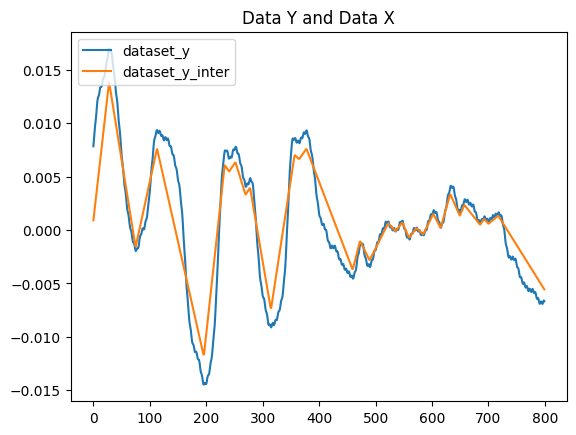

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (-1, 1))

#dataset_y = dataset_y.reshape(1, -1)
#dataset_y = sc.fit_transform(dataset_y)

dataset_y = preprocessing.normalize(dataset_y)

#dataset_x = dataset_x.reshape(1, -1)
#dataset_x = sc.fit_transform(dataset_x)


dataset_y_inter = preprocessing.normalize(dataset_y_inter)

#dataset_x = np.reshape(dataset_x, (27,800,1))
#dataset_y_inter = np.array(dataset_y_inter)
print (dataset_y.shape)
print(dataset_y_inter.shape)
#dataset_y = np.reshape(dataset_y, (27,800,1))
#print (dataset_x.shape)

#dataset_y_inter = dataset_y_inter.to_numpy()
#dataset_x = np.reshape(dataset_x, (27,800,1))
#print(dataset_y[0].shape)

dataset_y = dataset_y[:, :1000]
dataset_y = dataset_y[:, 200:]

dataset_y_inter = dataset_y_inter[:, :1000]
dataset_y_inter = dataset_y_inter[:, 200:]

plt.plot(dataset_y[10], label='dataset_y')
plt.plot(dataset_y_inter[10], label='dataset_y_inter')

plt.legend(loc="upper left")
plt.title("Data Y and Data X")
plt.show()



In [ ]:
from tensorflow.keras.layers import Dropout
#!pip install tensorflow_addons
dataset_y = dataset_y
#dataset_y_inter = dataset_y_inter.to_numpy()
dataset_x = dataset_y_inter
number_of_test = 7
test_y = dataset_y[number_of_test]

plt.plot(dataset_y[number_of_test],label='dataset_y')
plt.plot(dataset_x[number_of_test],label='dataset_x')
plt.legend(loc="upper left")
plt.show()

print (dataset_y.shape)
print (dataset_y_inter.shape)

#plt.plot(test_x, label='test_x')
#plt.plot(test_y, label='test_y')
#plt.legend(loc="upper left")
#plt.title("Test data and output data")
#plt.show()

num_classes = 4  # Modify this according to the number of classes in your classification task

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Assuming your dataset is stored in variables dataset_x and dataset_y
# dataset_x shape: (27, 800)
# dataset_y shape: (27, 800)
#dataset_x = dataset_x[:26, :, :]
#dataset_y = dataset_y[:26, :, :]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(800, 1), activation='relu'))
model.add(LSTM(units=10, return_sequences=True, activation='relu'))
model.add(LSTM(units=10, activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer)


#new_dataset_y = new_dataset_y.to_numpy()

model.fit(dataset_x, dataset_y, batch_size=50, epochs=1000)

print("ok1")
test_x = dataset_y_inter[number_of_test]
test_x = np.reshape(test_x, (800, 1))
print("ok2")



predicted_y_test = model.predict(test_x)
predicted_y_test = predicted_y_test.flatten()
plt.plot(predicted_y_test, label='Predicted_y_test')

plt.plot(test_y, label='Test_y')
plt.legend(loc="upper left")
plt.title("Test data and predicted data")
plt.show()






NameError: ignored